In [1]:
import pandas as pd
import numpy as np
import pickle
import os

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold

In [2]:
data = pd.read_csv("../Datasets/data_cfb_to_split.csv")
data


,Unnamed: 0,user_name,rating,boardgame_id,boardgame_name,rating_count,rating_mean
0,0,jens_hoppe,3.0,25554,Notre Dame,192,7.111125
1,1,KrisVerbeeck,7.0,25554,Notre Dame,192,7.111125
2,2,bazik123,6.0,25554,Notre Dame,192,7.111125
3,3,Chris Coyote,6.5,25554,Notre Dame,192,7.111125
4,4,Orph,7.0,25554,Notre Dame,192,7.111125
...,...,...,...,...,...,...,...
127117,127117,Michiel,4.5,95,Igel Ärgern,31,6.041935
127118,127118,dturnerfish,6.5,95,Igel Ärgern,31,6.041935
127119,127119,jayjonbeach,3.0,95,Igel Ärgern,31,6.041935
127120,127120,Defdamesdompi,6.5,95,Igel Ärgern,31,6.041935


In [3]:
data.columns

Index(['Unnamed: 0', 'user_name', 'rating', 'boardgame_id', 'boardgame_name',
       'rating_count', 'rating_mean'],
      dtype='object')

In [4]:
data = data[['user_name', 'rating',  'boardgame_name']]

In [5]:
train , test = train_test_split(data, random_state=42,test_size=0.2)
train

,user_name,rating,boardgame_name
123141,vejrum,7.000,Ice Flow
23099,familywontplay,6.800,Nautilus
28889,Blott,6.000,Jamaica
73886,Lone Ranger,7.000,Luna
101003,waddball,5.000,TransAmerica
...,...,...,...
119879,SantaInquisicion,5.062,Scarab Lords
103694,curtc,6.000,Paris Connection
860,dhable,6.000,Last Night on Earth: The Zombie Game
15795,HemlockWP,7.000,Mysterium


In [12]:
data

,user_name,rating,boardgame_name
0,jens_hoppe,3.0,Notre Dame
1,KrisVerbeeck,7.0,Notre Dame
2,bazik123,6.0,Notre Dame
3,Chris Coyote,6.5,Notre Dame
4,Orph,7.0,Notre Dame
...,...,...,...
127117,Michiel,4.5,Igel Ärgern
127118,dturnerfish,6.5,Igel Ärgern
127119,jayjonbeach,3.0,Igel Ärgern
127120,Defdamesdompi,6.5,Igel Ärgern


In [15]:
# Let's assume `data` is your original DataFrame
# with columns: 'user_name', 'boardgame_name', 'rating'

# Get all users
users = data['user_name'].unique()

# Dictionary to store actual games for each user
actual_user_games = {}

for user in users:
    # Filter the data for the current user
    user_data = data[data['user_name'] == user]
    
    # Get the board games this user has interacted with
    games = user_data['boardgame_name'].tolist()
    
    # Store in the dictionary
    actual_user_games[user] = games

# Now `actual_user_games` contains the actual board games each user has interacted with


In [63]:
actual_user_games

{'jens_hoppe': ['Notre Dame',
  'Race for the Galaxy',
  'Elasund: The First City',
  'Small World',
  'Hyperborea',
  'Treasure Hunter',
  'Eldritch Horror',
  'SET',
  'Container',
  'Brass: Birmingham',
  'Roma',
  'Wyatt Earp',
  'Blue Moon',
  'The Castles of Burgundy',
  'Domaine',
  'Priests of Ra',
  'Terra Mystica',
  'Carson City',
  'Genoa',
  'The Crew: The Quest for Planet Nine',
  'Takenoko',
  'Gulo Gulo',
  '6 nimmt!',
  'Stone Age',
  'Tsuro',
  'Kill Doctor Lucky',
  'The 7th Continent',
  'Witness',
  'Alhambra',
  'Bärenpark',
  'Saint Petersburg (Second Edition)',
  'O Zoo le Mio',
  'Talisman',
  'Space Hulk: Death Angel – The Card Game',
  'The Duke',
  'La Città',
  'Tajemnicze Domostwo',
  'Legends of Andor',
  'Concordia',
  'TAMSK',
  'King of Tokyo',
  'Colossal Arena',
  'Chicago Express',
  'Ascension: Deckbuilding Game',
  'Ys',
  'Flamme Rouge',
  'Once Upon a Time: The Storytelling Card Game',
  'Castle',
  'Vampire: The Eternal Struggle',
  'Cold War: 

In [64]:
import json
# Specify the file path
file_path = 'actual_user_games.json'

# Open the file and write the JSON data
with open(file_path, 'w') as file:
    json.dump(actual_user_games, file, indent=4)

In [24]:
len(actual_user_games["jens_hoppe"])

113

In [6]:
## Create Matrix for the User_Boardgame Interaction using pivot function
bg_pivot = data.pivot_table(columns="user_name", index="boardgame_name", values="rating")
bg_pivot.fillna(0.0, inplace= True)

In [20]:
data

,user_name,rating,boardgame_name
0,jens_hoppe,3.0,Notre Dame
1,KrisVerbeeck,7.0,Notre Dame
2,bazik123,6.0,Notre Dame
3,Chris Coyote,6.5,Notre Dame
4,Orph,7.0,Notre Dame
...,...,...,...
127117,Michiel,4.5,Igel Ärgern
127118,dturnerfish,6.5,Igel Ärgern
127119,jayjonbeach,3.0,Igel Ärgern
127120,Defdamesdompi,6.5,Igel Ärgern


In [7]:
model = NearestNeighbors(metric="cosine", algorithm="brute")
model.fit(bg_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

In [10]:
bg_pivot

user_name,1 Family Meeple,1000rpm,100pcBlade,1point21gigawatts,2ndPlace,3dicebombers,4Corners,521tiger,5th Beatles,ALGO,...,zaubererer,zautman,zb1035,zedeemia,zefquaavius,zeotter,zgabor,zombiegod,zumba,zumikon
boardgame_name,,,,,,,,,,,,,,,,,,,,,
10 Days in Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in the USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11 nimmt!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombie in My Pocket,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
Zombies!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
Zooloretto,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
distance, boardgame_idx_corr = model.kneighbors(bg_pivot, n_neighbors=10)

distance.shape




(1641, 10)

In [19]:
recommended_games = {user: [] for user in bg_pivot.columns}
recommended_games

{'1 Family Meeple': [],
 '1000rpm': [],
 '100pcBlade': [],
 '1point21gigawatts': [],
 '2ndPlace': [],
 '3dicebombers': [],
 '4Corners': [],
 '521tiger': [],
 '5th Beatles': [],
 'ALGO': [],
 'Aarontu': [],
 'Abdul': [],
 'Adam78': [],
 'Adanedhel': [],
 'Admiral Fisher': [],
 'AdmiralGT': [],
 'Aelf': [],
 'AfarOca': [],
 'Ajax': [],
 'Akado': [],
 'Akke': [],
 'AlPacino11': [],
 'Alan Stern': [],
 'Alannamairead': [],
 'AlasDemigod': [],
 'Albarc': [],
 'AlexFS': [],
 'AlfaGT': [],
 'Algernon88': [],
 'AmadanNaBriona': [],
 'AmandaDesignsGames': [],
 'AmassGames': [],
 'AmesGames': [],
 'AmethystJewel': [],
 'Anakin1981': [],
 'AnakinOU': [],
 'Android': [],
 'Andy Mesa': [],
 'Andy Pain': [],
 'Andy Parsons': [],
 'AndySzy': [],
 'Anemelos': [],
 'AngusBull': [],
 'AnotherHorrorFan': [],
 'Antares Rangers': [],
 'AnttiT': [],
 'Apple Paul': [],
 'Aratar': [],
 'Archvile': [],
 'Aredan1528': [],
 'Argantonio': [],
 'Arkeas': [],
 'ArkhamSign': [],
 'Armadillo Al': [],
 'Arnott': [],
 

In [20]:
for user in bg_pivot.columns:
    # Get the games the user has rated
    user_rated_games = bg_pivot[user][bg_pivot[user] > 0].index.tolist()
    
    for game in user_rated_games:
        # Get the index of the current game in the pivot table
        game_idx = bg_pivot.index.get_loc(game)
        
        # Get indices of the top 10 similar games
        similar_games_indices = boardgame_idx_corr[game_idx]
        
        # Convert these indices to board game names
        similar_games = bg_pivot.index[similar_games_indices].tolist()
        
        # Add these games to the user's recommendation list
        # Exclude games that the user has already rated
        recommended_games[user].extend([g for g in similar_games if g not in user_rated_games])
    
    # Optionally, limit the number of recommendations per user and remove duplicates
    recommended_games[user] = list(set(recommended_games[user]))[:10]


In [22]:
recommended_games["jens_hoppe"]

['Fleet',
 'Confusion:  Espionage and Deception in the Cold War',
 'Shakespeare',
 'Andromeda',
 'History of the World',
 'Majesty: For the Realm',
 'Axis & Allies',
 'Goldland',
 'Nova Luna',
 'Tikal']

In [26]:
bg_pivot.shape[1]

2086

In [41]:
from sklearn.metrics import precision_score

# Example code snippet for precision calculation
precision_at_k = []
for user in bg_pivot.columns:  # Iterate over each user
    # print(user)
    true_positives = len(list(set(actual_user_games[user]) & set(recommended_games[user])))
    precision_at_k.append(true_positives / len(recommended_games[user]))
    # print(true_positives)
    # print(precision_at_k)
    # break

average_precision_at_k = sum(precision_at_k)*1.0 / len(precision_at_k)
average_precision_at_k


0.0

In [34]:
recommended_games["1 Family Meeple"]

['Shakespeare',
 'Pergamon: Second Edition',
 'Axis & Allies',
 'Tikal',
 'Ticket to Ride: The Card Game',
 'Lords of Xidit',
 'Century: Spice Road',
 "It's a Wonderful World",
 'Terra Mystica',
 'Show Manager']

In [50]:
len(set(actual_user_games["1 Family Meeple"]))

62

In [49]:
len(list(set(actual_user_games["1 Family Meeple"]) | set(recommended_games["1 Family Meeple"])))

72

In [30]:
average_precision_at_k

0.0

In [43]:
from sklearn.metrics import recall_score

# Example code snippet for recall calculation
recall_at_k = []
for user in bg_pivot.columns:
    true_positives = set(actual_user_games[user]) & set(recommended_games[user])
    recall_at_k.append(len(true_positives) / len(actual_user_games[user]))

average_recall_at_k = sum(recall_at_k) / len(recall_at_k)


In [44]:
average_recall_at_k

0.0

In [45]:
def mean_average_precision(recommended_games, actual_user_games):
    aps = []
    for user in recommended_games.keys():
        ap = 0
        hits = 0
        for i, game in enumerate(recommended_games[user]):
            if game in actual_user_games[user]:
                hits += 1
                ap += hits / (i + 1)
        aps.append(ap / len(actual_user_games[user]) if actual_user_games[user] else 0)
    return sum(aps) / len(aps)

In [46]:
mean_average_precision(recommended_games, actual_user_games)

0.0

In [90]:
distance, boardgame_idx_corr = model.kneighbors(bg_pivot, n_neighbors=10)

# distance
average_distances = np.mean(distance, axis=1)
average_distances
len(average_distances[average_distances > 0.75]) / len(average_distances)




0.9387402933563417

In [78]:
kfold = KFold(n_splits=5)
ad_list = []
for train_indx, test_indx in kfold.split(data):
    train, test = data.iloc[train_indx, :], data.iloc[test_indx,:]

        ## Create Matrix for the User_Boardgame Interaction using pivot function
    bg_pivot = train.pivot_table(columns="user_name", index="boardgame_name", values="rating")
    bg_pivot.fillna(0.0, inplace= True)
    bg_pivot_test = train.pivot_table(columns="user_name", index="boardgame_name", values="rating")
    bg_pivot_test.fillna(0.0, inplace= True)
    model = NearestNeighbors(metric="cosine", algorithm="brute")
    model.fit(bg_pivot)
    distance, boardgame_idx_corr = model.kneighbors(bg_pivot_test, n_neighbors=10)
    average_distances = np.mean(distance, axis=1)
    ad_list.append(len(average_distances[average_distances > 0.75]) / len(average_distances))



In [80]:
sum(ad_list) / len(ad_list)

0.9532309021261286

#### Kết thúc tại đây, hiệu suất tương đối là 95,32%

In [83]:
distance, boardgame_idx_corr = model.kneighbors(bg_pivot, n_neighbors=10)
bg_pivot.iloc[boardgame_idx_corr[0], :]
distance[0]

# relevances = 
# def dcg_score(relevances):
#     return np.sum((2 ** relevances - 1) / np.log2(np.arange(2, len(relevances) + 2)))

# def ndcg_score(relevances):
#     ideal_relevances = np.sort(relevances)[::-1]
#     dcg = dcg_score(relevances)
#     idcg = dcg_score(ideal_relevances)
#     return dcg / idcg if idcg != 0 else 0

# ndcg = ndcg_score(relevances)
# print("NDCG score:", ndcg)

array([1.11022302e-16, 8.24110009e-01, 8.37218657e-01, 8.42026452e-01,
       8.58533983e-01, 8.61859224e-01, 8.62865262e-01, 8.63789178e-01,
       8.64431537e-01, 8.65696509e-01])

In [68]:
def collaborative_filtering_RS(model, boardgame_name, bg_pivot, k):
    bg_names = []
    boardgame_idx = np.where(bg_pivot.index == boardgame_name)[0][0]
    print(boardgame_idx)
    return
    distance, boardgame_idx_corr = model.kneighbors(bg_pivot.iloc[boardgame_idx, :].values.reshape(1,-1), n_neighbors=k)
    ## Item-based Recommendation Systems

    col_names = bg_pivot.index[boardgame_idx_corr[0]].tolist()
    zipped = list(zip(col_names[1:], distance[1:])) # bỏ chính nó
    sort = sorted(zipped, key=lambda x : x[1])
    # items_dict[boardgame_name] = sort
    for i in range(len(sort)):
        bg_names.append(sort[i][0])
    return bg_names

SyntaxError: 'break' outside loop (597077733.py, line 5)

In [ ]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


data = Dataset.load_builtin("ml-100k")
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

#### Test

In [45]:
test = test[test["rating"] >= 7.0]

In [47]:
## Create Matrix for the User_Boardgame Interaction using pivot function
bg_pivot_test = test.pivot_table(columns="user_name", index="boardgame_name", values="rating")
bg_pivot_test.fillna(0.0, inplace= True)

In [48]:
def corr_pearson(bg_pivot_test):
    # Chuyển DataFrame thành mảng NumPy
    matrix = bg_pivot_test.to_numpy()


    # Tính ma trận tương quan Spearman
    correlation_matrix = bg_pivot_test.T.corr(method="spearman")
    print(correlation_matrix)
    # Tạo DataFrame từ ma trận tương quan với tên cột
    correlation_df = pd.DataFrame(correlation_matrix, columns=bg_pivot_test.index, index=bg_pivot_test.index)

    print("Ma trận tương quan:")
    display(correlation_df)
    
    return correlation_df

In [68]:
def item_relevant(correlation_df):
    bg_corr = {}
    bg_corr_non_rate = {}
    for i in correlation_df.columns:
        value = correlation_df[correlation_df[i] > 0.1][i].values
        boardgame_corr = correlation_df[correlation_df[i] > 0.1][i].index
        boardgame_corr = [i for i in boardgame_corr]
        zipped = list(zip(boardgame_corr[1:], value[1:]))
        sort = sorted(zipped, key=lambda x : x[1], reverse=True)
        bg_name = [i for i, j in sort]
        bg_corr[i] = sort
        bg_corr_non_rate[i] = bg_name
    
    return bg_corr, bg_corr_non_rate


In [69]:
correlation_df_test = corr_pearson(bg_pivot_test)
# correlation_df

boardgame_name                     10 Days in Africa  10 Days in Asia  \
boardgame_name                                                          
10 Days in Africa                           1.000000        -0.001280   
10 Days in Asia                            -0.001280         1.000000   
10 Days in Europe                          -0.001280        -0.001045   
10 Days in the USA                         -0.001280        -0.001045   
13 Days: The Cuban Missile Crisis          -0.001811        -0.001479   
...                                              ...              ...   
Zombicide: Black Plague                    -0.001811        -0.001479   
Zombie Fluxx                               -0.000905        -0.000739   
Zombies!!!                                 -0.000905        -0.000739   
Zooloretto                                 -0.002564        -0.002093   
ZÈRTZ                                      -0.002026        -0.001653   

boardgame_name                     10 Days in Euro

boardgame_name,10 Days in Africa,10 Days in Asia,10 Days in Europe,10 Days in the USA,13 Days: The Cuban Missile Crisis,1775: Rebellion,1812: The Invasion of Canada,1830: Railways & Robber Barons,1846: The Race for the Midwest,1960: The Making of the President,...,Yspahan,Zendo,ZhanGuo,Ziegen Kriegen,Zombicide,Zombicide: Black Plague,Zombie Fluxx,Zombies!!!,Zooloretto,ZÈRTZ
boardgame_name,,,,,,,,,,,,,,,,,,,,,
10 Days in Africa,1.000000,-0.001280,-0.001280,-0.001280,-0.001811,-0.001568,-0.001280,-0.002220,-0.002398,-0.003518,...,-0.003397,-0.001811,-0.001811,-0.000905,-0.002026,-0.001811,-0.000905,-0.000905,-0.002564,-0.002026
10 Days in Asia,-0.001280,1.000000,-0.001045,-0.001045,-0.001479,-0.001280,-0.001045,-0.001812,-0.001957,-0.002871,...,-0.002773,-0.001479,-0.001479,-0.000739,-0.001653,-0.001479,-0.000739,-0.000739,-0.002093,-0.001653
10 Days in Europe,-0.001280,-0.001045,1.000000,0.499478,-0.001479,-0.001280,-0.001045,-0.001812,-0.001957,0.180229,...,-0.002773,-0.001479,-0.001479,-0.000739,-0.001653,-0.001479,-0.000739,-0.000739,-0.002093,-0.001653
10 Days in the USA,-0.001280,-0.001045,0.499478,1.000000,-0.001479,-0.001280,-0.001045,-0.001812,-0.001957,-0.002871,...,-0.002773,-0.001479,-0.001479,-0.000739,-0.001653,-0.001479,-0.000739,-0.000739,-0.002093,-0.001653
13 Days: The Cuban Missile Crisis,-0.001811,-0.001479,-0.001479,-0.001479,1.000000,-0.001811,-0.001479,-0.002564,-0.002770,-0.004063,...,-0.003924,-0.002092,-0.002092,-0.001045,-0.002340,-0.002092,-0.001045,-0.001045,-0.002962,-0.002340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombicide: Black Plague,-0.001811,-0.001479,-0.001479,-0.001479,-0.002092,-0.001811,-0.001479,-0.002564,-0.002770,-0.004063,...,-0.003924,-0.002092,-0.002092,-0.001045,-0.002340,1.000000,-0.001045,-0.001045,0.174370,-0.002340
Zombie Fluxx,-0.000905,-0.000739,-0.000739,-0.000739,-0.001045,-0.000905,-0.000739,-0.001281,-0.001384,-0.002030,...,-0.001961,-0.001045,-0.001045,-0.000522,-0.001169,-0.001045,1.000000,-0.000522,-0.001480,-0.001169
Zombies!!!,-0.000905,-0.000739,-0.000739,-0.000739,-0.001045,-0.000905,-0.000739,-0.001281,-0.001384,-0.002030,...,-0.001961,-0.001045,-0.001045,-0.000522,-0.001169,-0.001045,-0.000522,1.000000,-0.001480,-0.001169


In [44]:
correlation_df_test[correlation_df_test["10 Days in Africa"] > 0.1]

boardgame_name,10 Days in Africa,10 Days in Asia,10 Days in Europe,10 Days in the USA,13 Days: The Cuban Missile Crisis,1775: Rebellion,1812: The Invasion of Canada,1830: Railways & Robber Barons,1846: The Race for the Midwest,1960: The Making of the President,...,Yspahan,Zendo,ZhanGuo,Ziegen Kriegen,Zombicide,Zombicide: Black Plague,Zombie Fluxx,Zombies!!!,Zooloretto,ZÈRTZ
boardgame_name,,,,,,,,,,,,,,,,,,,,,
10 Days in Africa,1.000000,-0.001280,-0.001280,-0.001280,-0.001811,-0.001568,-0.001280,-0.002220,-0.002398,-0.003518,...,-0.003397,-0.001811,-0.001811,-0.000905,-0.002026,-0.001811,-0.000905,-0.000905,-0.002564,-0.002026
Carcassonne: Hunters and Gatherers,0.157442,-0.002672,-0.002672,-0.002672,-0.003780,-0.003273,-0.002672,-0.004632,-0.005005,-0.007342,...,-0.007091,-0.003780,-0.003780,-0.001889,-0.004228,-0.003780,-0.001889,-0.001889,-0.005352,-0.004228
China,0.190737,-0.002221,-0.002221,0.234530,-0.003142,-0.002720,-0.002221,-0.003850,-0.004160,-0.006102,...,-0.005894,-0.003142,-0.003142,-0.001570,-0.003514,-0.003142,-0.001570,-0.001570,-0.004448,-0.003514
FITS,0.332113,-0.001280,-0.001280,-0.001280,-0.001811,-0.001568,-0.001280,-0.002220,-0.002398,-0.003518,...,-0.003397,-0.001811,-0.001811,-0.000905,-0.002026,-0.001811,-0.000905,-0.000905,-0.002564,-0.002026
Goa,0.110371,-0.003717,-0.003717,-0.003717,-0.005259,-0.004553,-0.003717,-0.006444,-0.006962,-0.010213,...,-0.009864,-0.005259,-0.005259,-0.002627,-0.005881,-0.005259,0.198002,-0.002627,-0.007445,-0.005881
Hammer of the Scots,0.201933,-0.002093,-0.002093,-0.002093,-0.002962,-0.002564,-0.002093,-0.003629,-0.003921,-0.005752,...,-0.005555,-0.002962,-0.002962,-0.001480,-0.003312,-0.002962,-0.001480,-0.001480,-0.004193,-0.003312
Kalah,0.577350,-0.000739,-0.000739,-0.000739,-0.001045,-0.000905,-0.000739,-0.001281,-0.001384,-0.002030,...,-0.001961,-0.001045,-0.001045,-0.000522,-0.001169,-0.001045,-0.000522,-0.000522,-0.001480,-0.001169
Lost Cities,0.111462,0.138261,-0.003717,-0.003717,-0.005259,-0.004553,-0.003717,-0.006444,-0.006962,-0.010213,...,-0.009864,-0.005259,-0.005259,-0.002627,-0.005881,-0.005259,-0.002627,-0.002627,-0.007445,-0.005881
Mahjong,0.287392,-0.001479,-0.001479,-0.001479,-0.002092,-0.001811,-0.001479,-0.002564,-0.002770,-0.004063,...,-0.003924,0.248692,-0.002092,-0.001045,-0.002340,-0.002092,-0.001045,-0.001045,-0.002962,-0.002340


In [70]:
_ , dictionary_item_relevants = item_relevant(correlation_df_test)
dictionary_item_relevants

{'10 Days in Africa': ['Kalah',
  'Unpublished Prototype',
  'FITS',
  'Mahjong',
  'Taboo',
  'Hammer of the Scots',
  'China',
  'TransAmerica',
  'Carcassonne: Hunters and Gatherers',
  'Lost Cities',
  'Goa'],
 '10 Days in Asia': ['Excape',
  'Clippers',
  'Rivals for Catan',
  'Friday the 13th',
  'Carcassonne: The Discovery',
  'Blockers!',
  "Winner's Circle",
  'Union Pacific',
  'Dominant Species',
  'Lost Cities',
  'Carcassonne'],
 '10 Days in Europe': ['Amazonas',
  '10 Days in the USA',
  'Axis & Allies',
  'Talisman',
  'The Bucket King',
  'Mord im Arosa',
  'Catan Card Game',
  'Roads & Boats',
  'Power Grid: Factory Manager',
  'Mykerinos',
  'Diplomacy',
  '1960: The Making of the President',
  'Through the Ages: A Story of Civilization',
  'In the Year of the Dragon',
  'Endeavor',
  'Grand Austria Hotel',
  'Kingdomino',
  'Lord of the Rings: The Confrontation',
  'Blokus',
  'Power Grid'],
 '10 Days in the USA': ['10 Days in the USA',
  'Amazonas',
  'Augsburg 1520

### Evaluate model

In [71]:
def precision_at_k(actual, predicted, k):
    # Take top-k predicted items
    predicted_k = predicted[:k]
    # Count the number of common items between actual and predicted
    common_items = set(actual) & set(predicted_k)
    # Calculate precision@k
    precision = len(common_items) / k if k > 0 else 0
    return precision

def recall_at_k(actual, predicted, k):
    # Take top-k predicted items
    predicted_k = predicted[:k]
    # Count the number of common items between actual and predicted
    common_items = set(actual) & set(predicted_k)
    # Calculate recall@k
    recall = len(common_items) / len(actual) if len(actual) > 0 else 0
    return recall

In [72]:
def collaborative_filtering_RS(model, boardgame_name, bg_pivot, k):
    bg_names = []
    boardgame_idx = np.where(bg_pivot.index == boardgame_name)[0][0]
    # print(boardgame_idx)
    distance, boardgame_idx_corr = model.kneighbors(bg_pivot.iloc[boardgame_idx, :].values.reshape(1,-1), n_neighbors=k + 1)
    ## Item-based Recommendation Systems
    col_names = bg_pivot.index[boardgame_idx_corr[0]].tolist()
    zipped = list(zip(col_names[1:], distance[0][1:])) # bỏ chính nó
    sort = sorted(zipped, key=lambda x : x[1], reverse=True)
    # print(sort)
    # return
    # items_dict[boardgame_name] = sort
    for i in range(len(sort)):
        bg_names.append(sort[i][0])
    return bg_names
# l = collaborative_filtering_RS(model,  "10 Days in Africa", bg_pivot, k)
# l

In [77]:
k = 1454 # Value of k for precision@k and recall@k
predictions = {}
actuals = {}
for i in bg_pivot_test.index:
    list_pred = collaborative_filtering_RS(model,  i, bg_pivot, k)
    predictions[i] = list_pred
    actuals[i] = dictionary_item_relevants[i]
    


d:\Data Scientist (Classes)\Recommendation Systems\Final Project\Final_miniproject\env_rsproject\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
d:\Data Scientist (Classes)\Recommendation Systems\Final Project\Final_miniproject\env_rsproject\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
d:\Data Scientist (Classes)\Recommendation Systems\Final Project\Final_miniproject\env_rsproject\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
d:\Data Scientist (Classes)\Recommendation Systems\Final Project\Final_miniproject\env_rsproject\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
 

In [78]:
precision_list = []
recall_list = []
for i, y in actuals.items():
    precision_k = precision_at_k(actuals[i], predictions[i], k)
    recall_k = recall_at_k(actuals[i], predictions[i], k)
    precision_list.append(precision_k)
    recall_list.append(recall_k)



precision = sum(precision_list) / len(precision_list)
recall = sum(recall_list) / len(recall_list)
print(f"Precision@{k}: {precision}")
print(f"Recall@{k}: {recall}")
print(len(precision_list))
print(recall_list)
actuals["10 Days in Africa"]

Precision@1454: 0.012269979249091258
Recall@1454: 0.8491996341772156
1455
[1.0, 0.9090909090909091, 1.0, 0.9444444444444444, 1.0, 0.8571428571428571, 0.9285714285714286, 0.9444444444444444, 0.8064516129032258, 0.9230769230769231, 1.0, 1.0, 1.0, 0.9090909090909091, 1.0, 0.9696969696969697, 0.7777777777777778, 0.8, 0.8928571428571429, 0.9230769230769231, 0.9047619047619048, 0.9230769230769231, 0.9210526315789473, 0.8571428571428571, 0.8928571428571429, 0.9230769230769231, 0.6666666666666666, 0.9411764705882353, 0.75, 1.0, 0.8888888888888888, 0.9565217391304348, 0.8867924528301887, 0.8695652173913043, 0.8235294117647058, 0.6, 1.0, 0.9375, 1.0, 0.9565217391304348, 0.8461538461538461, 1.0, 0.8181818181818182, 1.0, 0.8947368421052632, 1.0, 0.7692307692307693, 0.84, 0.9090909090909091, 0.9629629629629629, 0.9210526315789473, 1.0, 0.9, 0.84375, 0.8333333333333334, 0.868421052631579, 0.9285714285714286, 0.8181818181818182, 0.8974358974358975, 0.8461538461538461, 0.9090909090909091, 0.9534883720

['Kalah',
 'Unpublished Prototype',
 'FITS',
 'Mahjong',
 'Taboo',
 'Hammer of the Scots',
 'China',
 'TransAmerica',
 'Carcassonne: Hunters and Gatherers',
 'Lost Cities',
 'Goa']

In [35]:
predictions["10 Days in Africa"]


['StreetSoccer',
 'Beowulf: The Legend',
 'Chrononauts',
 'Nacht der Magier',
 'Detroit-Cleveland Grand Prix',
 'Oceania',
 'Amazonas',
 '10 Days in Europe',
 "Reiner Knizia's Amazing Flea Circus",
 'DVONN']

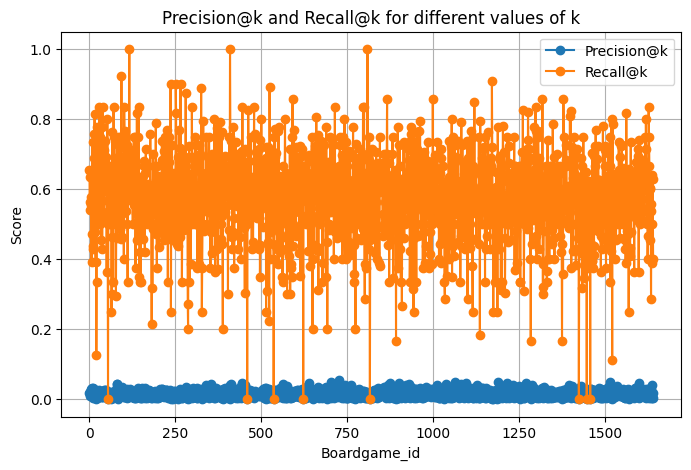

In [31]:
import matplotlib.pyplot as plt
ks = list(range(1, 1642))

plt.figure(figsize=(8, 5))
plt.plot(ks, precision_list, marker='o', label='Precision@k')
plt.plot(ks, recall_list, marker='o', label='Recall@k')
plt.xlabel('Boardgame_id')
plt.ylabel('Score')
plt.title('Precision@k and Recall@k for different values of k')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
train.to_csv("artifacts/data_train.csv", index= False)
test.to_csv("artifacts/data_test.csv", index= False)


In [51]:
from sklearn.model_selection import train_test_split

# Original DataFrame: `data` with columns ['user_name', 'boardgame_name', 'rating']

# For each user, split their interactions into training and test sets
train_data = []
test_data = []

for user in data['user_name'].unique():
    user_data = data[data['user_name'] == user]
    
    if len(user_data) > 1:  # Ensure there's enough data to split
        user_train, user_test = train_test_split(user_data, test_size=0.2)
        train_data.append(user_train)
        test_data.append(user_test)

# Combine all user splits into a single DataFrame
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)


In [52]:
bg_pivot_train = train_data.pivot_table(columns="user_name", index="boardgame_name", values="rating")
bg_pivot_train.fillna(0.0, inplace=True)


In [53]:
# Train the model on the training pivot table
model = NearestNeighbors(metric="cosine", algorithm="brute")
model.fit(bg_pivot_train)

# Get recommendations based on training data
distance, boardgame_idx_corr = model.kneighbors(bg_pivot_train, n_neighbors=10)

recommended_games = {}

for user in bg_pivot_train.columns:
    recommended_games[user] = []
    user_rated_games = bg_pivot_train[user][bg_pivot_train[user] > 0].index.tolist()

    for game in user_rated_games:
        game_idx = bg_pivot_train.index.get_loc(game)
        similar_games_indices = boardgame_idx_corr[game_idx]
        similar_games = bg_pivot_train.index[similar_games_indices].tolist()

        recommended_games[user].extend([g for g in similar_games if g not in user_rated_games])

    recommended_games[user] = list(set(recommended_games[user]))[:10]


In [55]:
def precision_at_k(recommended_games, actual_user_games, k=10):
    precisions = []
    for user in recommended_games.keys():
        recommended_k = recommended_games[user][:k]
        relevant_items = set(recommended_k) & set(actual_user_games[user])
        precisions.append(len(relevant_items) / len(recommended_k))
    return sum(precisions) / len(precisions)

In [56]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def recall_at_k(recommended_games, actual_user_games, k=10):
    recalls = []
    for user in recommended_games.keys():
        recommended_k = recommended_games[user][:k]
        relevant_items = set(recommended_k) & set(actual_user_games[user])
        recalls.append(len(relevant_items) / len(actual_user_games[user]))
    return sum(recalls) / len(recalls)

In [57]:
# Create a dictionary for actual user games based on the test data
actual_user_games_test = test_data.groupby('user_name')['boardgame_name'].apply(list).to_dict()

# Now evaluate the recommendations
precision = precision_at_k(recommended_games, actual_user_games_test)
recall = recall_at_k(recommended_games, actual_user_games_test)
map_score = mean_average_precision(recommended_games, actual_user_games_test)

print(f"Precision@10: {precision}")
print(f"Recall@10: {recall}")
print(f"MAP: {map_score}")


Precision@10: 0.012901678657074391
Recall@10: 0.010605877392132874
MAP: 0.003428363070638809
